In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set(style="whitegrid")
np.random.seed(42)

base_requests = np.random.poisson(lam=1500, size=355)
anomaly_requests = np.random.poisson(lam=3000, size=10)
web_requests = np.concatenate([base_requests, anomaly_requests])

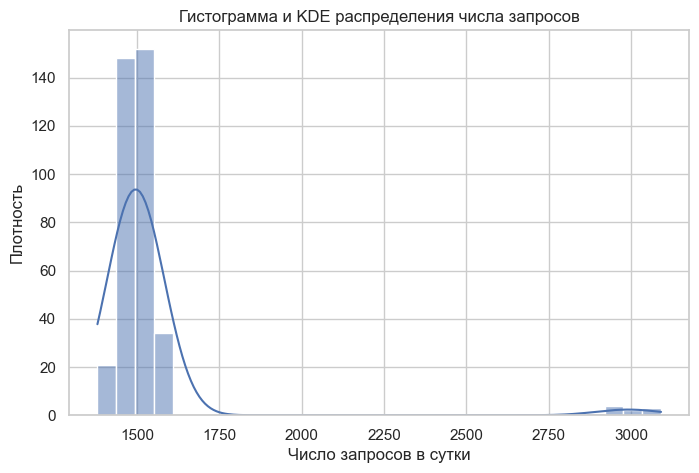

In [2]:
plt.figure(figsize=(8, 5))
sns.histplot(web_requests, bins=30, kde=True)
plt.xlabel("Число запросов в сутки")
plt.ylabel("Плотность")
plt.title("Гистограмма и KDE распределения числа запросов")
plt.show()

In [3]:
sorted_data = np.sort(web_requests)
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

x = np.linspace(sorted_data.min(), sorted_data.max(), 300)

mu, sigma = web_requests.mean(), web_requests.std()
exp_lambda = 1 / web_requests.mean()
lognorm_shape, lognorm_loc, lognorm_scale = stats.lognorm.fit(web_requests)

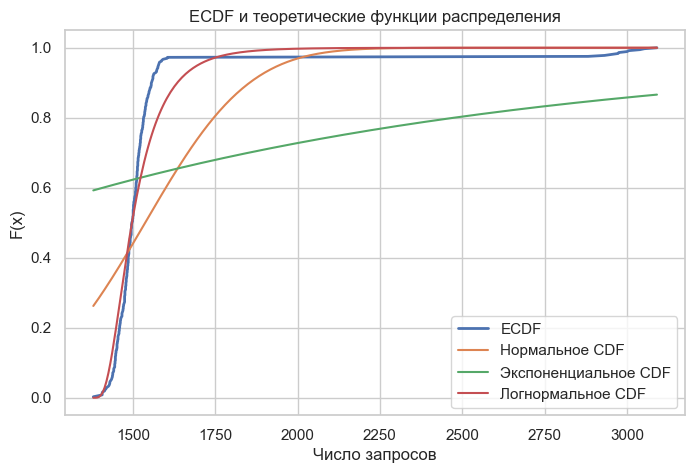

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(sorted_data, ecdf, label="ECDF", linewidth=2)
plt.plot(x, stats.norm.cdf(x, mu, sigma), label="Нормальное CDF")
plt.plot(x, stats.expon.cdf(x, scale=1 / exp_lambda), label="Экспоненциальное CDF")
plt.plot(
    x,
    stats.lognorm.cdf(x, lognorm_shape, lognorm_loc, lognorm_scale),
    label="Логнормальное CDF",
)

plt.legend()
plt.title("ECDF и теоретические функции распределения")
plt.xlabel("Число запросов")
plt.ylabel("F(x)")
plt.show()

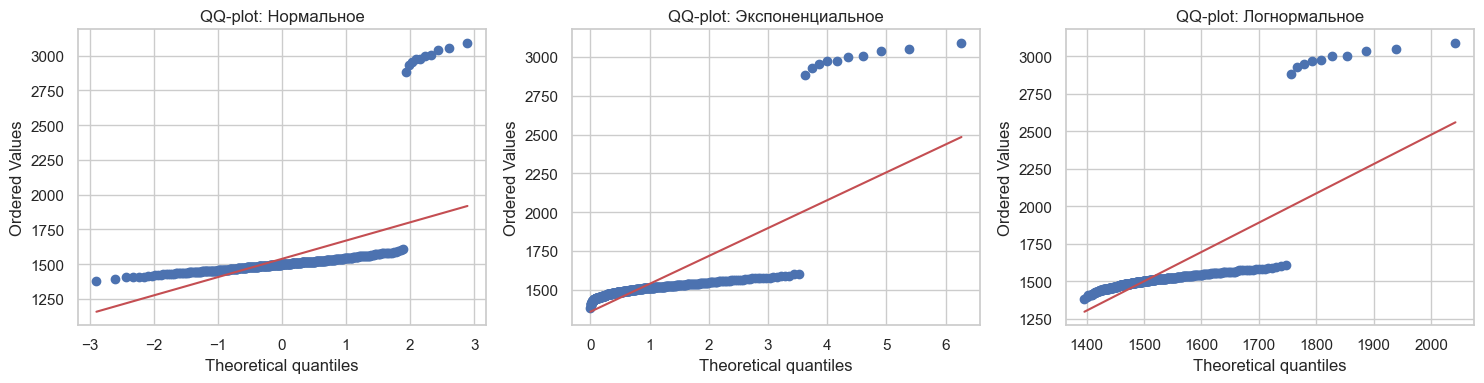

In [5]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
stats.probplot(web_requests, dist="norm", plot=plt)
plt.title("QQ-plot: Нормальное")

plt.subplot(1, 3, 2)
stats.probplot(web_requests, dist="expon", plot=plt)
plt.title("QQ-plot: Экспоненциальное")

plt.subplot(1, 3, 3)
stats.probplot(
    web_requests,
    dist=stats.lognorm(s=lognorm_shape, loc=lognorm_loc, scale=lognorm_scale),
    plot=plt,
)
plt.title("QQ-plot: Логнормальное")

plt.tight_layout()
plt.show()

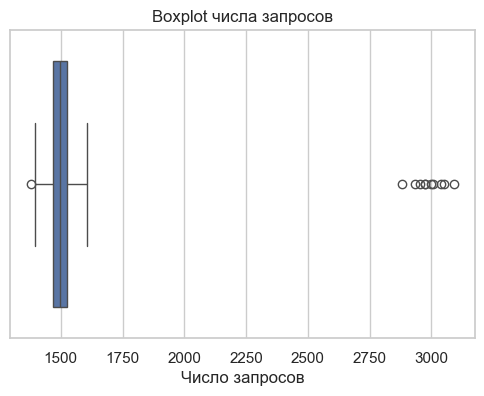

In [6]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=web_requests)
plt.title("Boxplot числа запросов")
plt.xlabel("Число запросов")
plt.show()

In [7]:
mean = web_requests.mean()
median = np.median(web_requests)
std = web_requests.std()
skew = stats.skew(web_requests)
kurt = stats.kurtosis(web_requests)

print(f"Среднее: {mean:.2f}")
print(f"Медиана: {median:.2f}")
print(f"Стандартное отклонение: {std:.2f}")
print(f"Асимметрия: {skew:.3f}")
print(f"Эксцесс: {kurt:.3f}")

_, p_norm = stats.shapiro(web_requests)
print(f"Нормальное, p-value Шапиро–Уилка: {p_norm:.4f}")

_, p_exp = stats.kstest(web_requests, "expon", args=(0, web_requests.mean()))
_, p_lognorm = stats.kstest(
    web_requests, "lognorm", args=(lognorm_shape, lognorm_loc, lognorm_scale)
)

print(f"Экспоненциальное, p-value Колмогорова-Смирнова: {p_exp:.4f}")
print(f"Логнормальное, p-value Колмогорова-Смирнова: {p_lognorm:.4f}")

_, p_ad_norm = stats.anderson(web_requests, dist="norm", method="interpolate")
_, p_ad_exp = stats.anderson(web_requests, dist="expon", method="interpolate")

print(f"Нормально, p-value Андерсона-Дарлинга: {p_ad_norm:.4f}")
print(f"Экспоненциальное, p-value Андерсона-Дарлинга: {p_ad_exp:.4f}")

Среднее: 1537.38
Медиана: 1497.00
Стандартное отклонение: 247.29
Асимметрия: 5.568
Эксцесс: 29.980
Нормальное, p-value Шапиро–Уилка: 0.0000
Экспоненциальное, p-value Колмогорова-Смирнова: 0.0000
Логнормальное, p-value Колмогорова-Смирнова: 0.0000
Нормально, p-value Андерсона-Дарлинга: 0.0100
Экспоненциальное, p-value Андерсона-Дарлинга: 0.0100


In [8]:
threshold = np.percentile(web_requests, 95)
print(f"Порог аномальной нагрузки (95%): {threshold:.0f}")

prob_2500 = 1 - stats.lognorm.cdf(2500, lognorm_shape, lognorm_loc, lognorm_scale)
print(f"P(X > 2500) ≈ {prob_2500:.4f}")

Порог аномальной нагрузки (95%): 1578
P(X > 2500) ≈ 0.0001
